# Deep Learning: Training Nearul Network - Regression and Classification Tasks

In [72]:
# Import necessary libs
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score, classification_report
from ucimlrepo import fetch_ucirepo
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

## Regression

### Loading, Defining and Understanding the Dataset

In [4]:
df = pd.read_csv('train.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [7]:
df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [10]:
df['season'].value_counts()

,count
season,
4,2734
2,2733
3,2733
1,2686


### Visualization

array([[<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>, <Axes: >]], dtype=object)

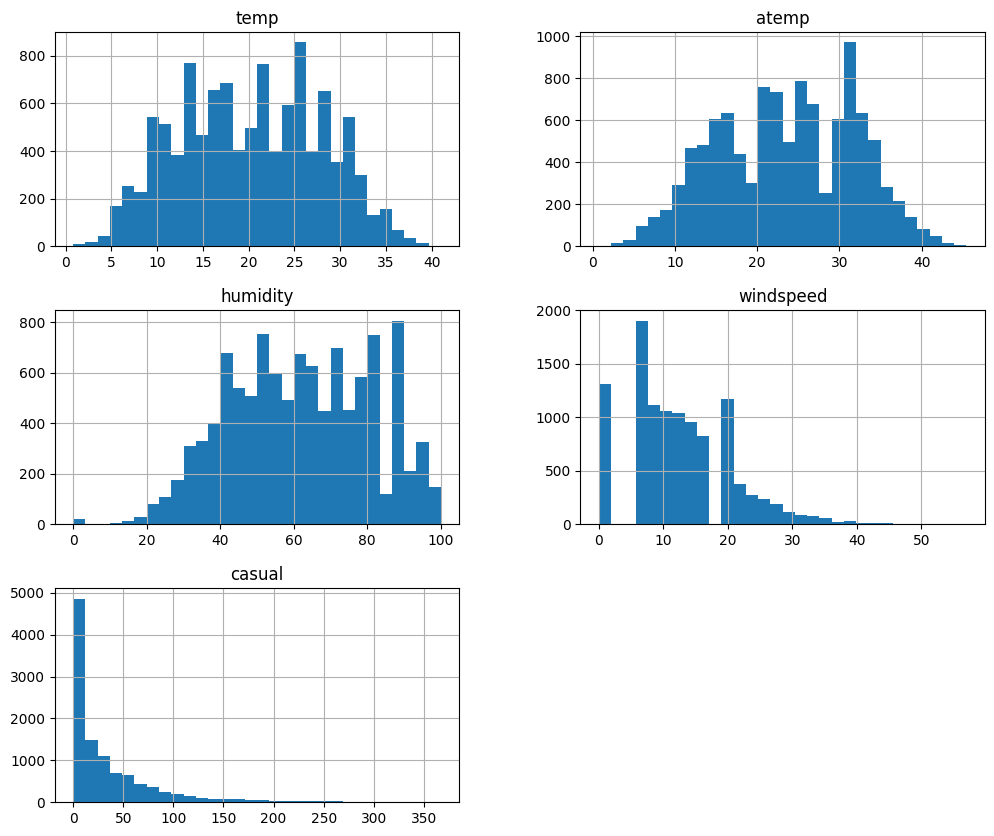

In [16]:
# Histogram
cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual']
df[cols].hist(figsize=(12, 10), bins=30)

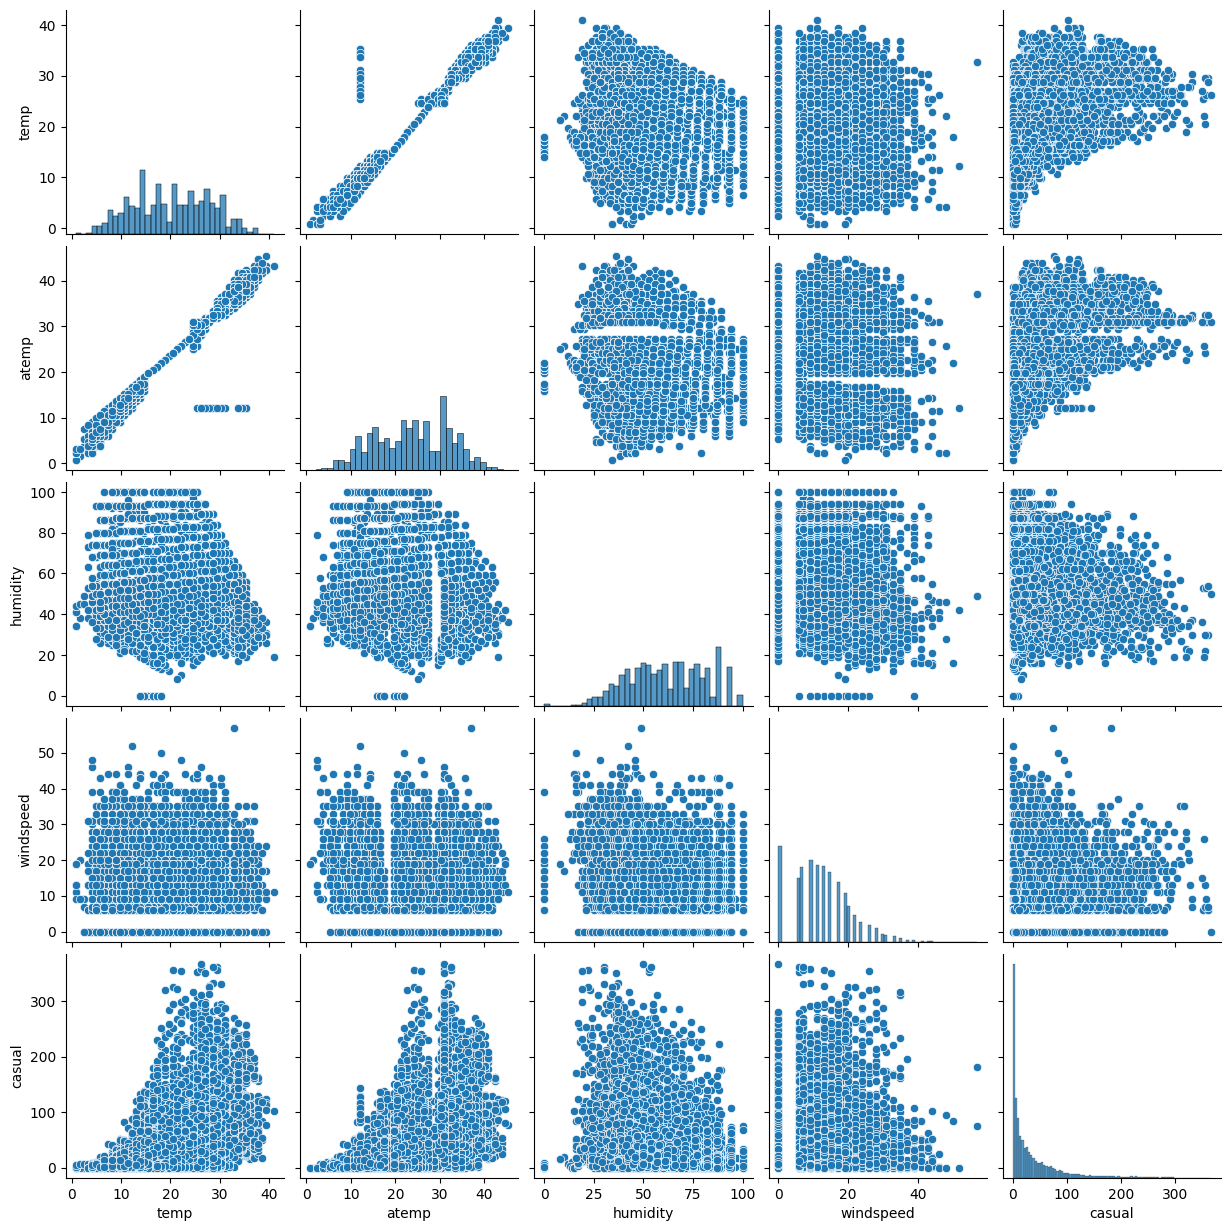

In [17]:
# Pairplot
sns.pairplot(df[cols])

<Axes: >

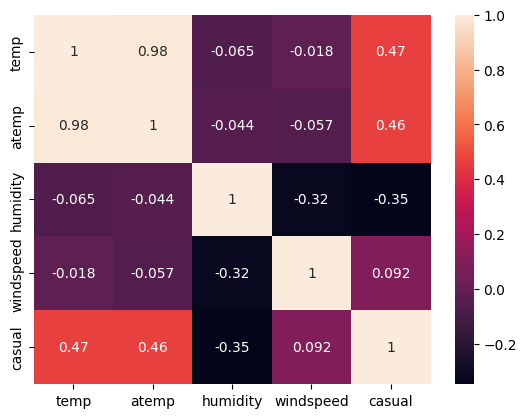

In [18]:
# Correlation Matrix
corr = df[cols].corr()
sns.heatmap(corr, annot=True)

### Preprocessing

In [39]:
# Split the data to X and y
X = df.drop(['count', 'datetime'], axis=1)
y = df['count']

In [40]:
X.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,1,0,0,1,9.84,14.395,81,0.0,3,13
1,1,0,0,1,9.02,13.635,80,0.0,8,32
2,1,0,0,1,9.02,13.635,80,0.0,5,27
3,1,0,0,1,9.84,14.395,75,0.0,3,10
4,1,0,0,1,9.84,14.395,75,0.0,0,1


In [41]:
y.shape

(10886,)

In [42]:
# Split the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
X.shape

(10886, 10)

### Training and Evaluating the model

In [45]:
# Build the model
model = Sequential([
    Input(shape=(10,)),  # Define input shape explicitly
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [46]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 64598.4922 - mae: 181.9954 - val_loss: 16186.7275 - val_mae: 89.1256
Epoch 2/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10752.2617 - mae: 73.5285 - val_loss: 2837.7698 - val_mae: 43.1551
Epoch 3/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2121.4724 - mae: 37.1478 - val_loss: 957.9452 - val_mae: 25.1270
Epoch 4/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 845.4125 - mae: 23.7969 - val_loss: 557.6923 - val_mae: 19.3805
Epoch 5/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 532.0861 - mae: 18.4280 - val_loss: 321.0381 - val_mae: 14.2666
Epoch 6/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 284.5944 - mae: 13.1845 - val_loss: 161.5980 - val_mae: 9.6489
Epoch 7/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 148.2043 - mae: 8.8754 - val_loss: 81.5746 - val_mae: 6.6904
Epoch 8/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 78.8778 - mae: 6.2779 - val_loss: 47.7945 - val_mae: 5.1358

In [47]:
# Predict house prices
y_pred = model.predict(X_test)

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [48]:
# Evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

R2 Score: 0.9999926686286926
Mean Absolute Error: 0.36054956912994385
Mean Squared Error: 0.24273286759853363


## Classification

### Loading, Defining and Understanding the Dataset

In [52]:
 # fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

df = pd.concat([X, y], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [53]:
df.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [55]:
df.isnull().sum()

,0
age,0
job,288
marital,0
education,1857
default,0
balance,0
housing,0
loan,0
contact,13020
day_of_week,0


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day_of_week'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>, <Axes: >, <Axes: >]],
      dtype=object)

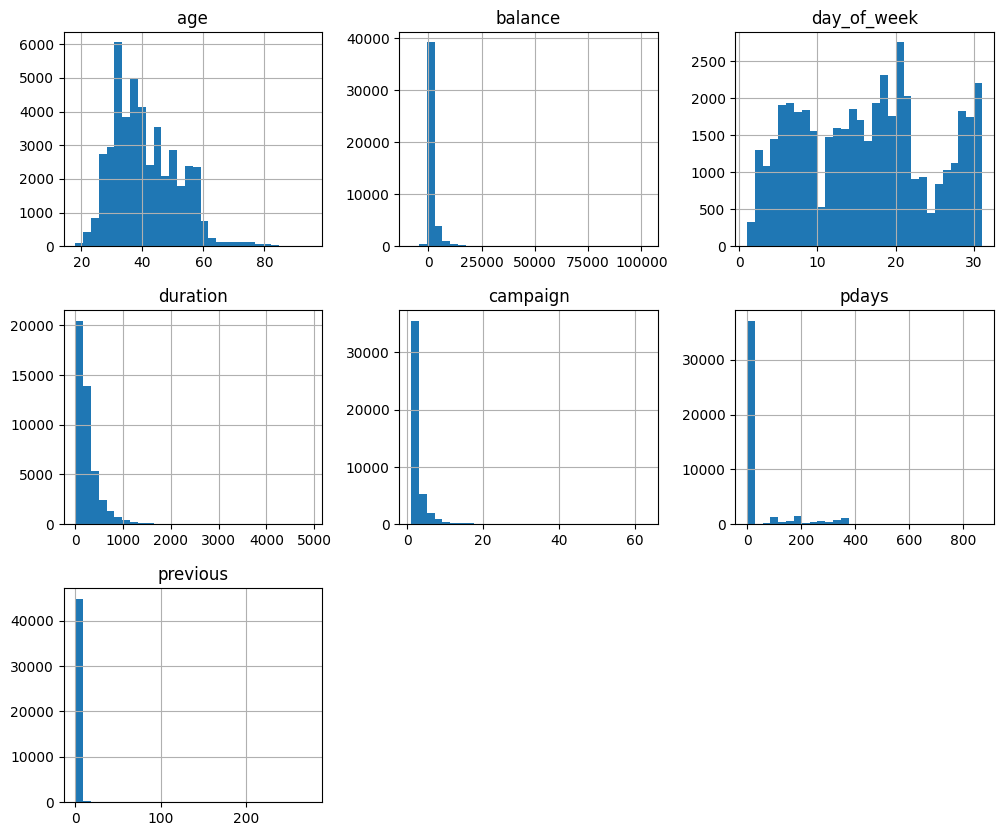

In [58]:
# Histogram
df.hist(figsize=(12, 10), bins=30)

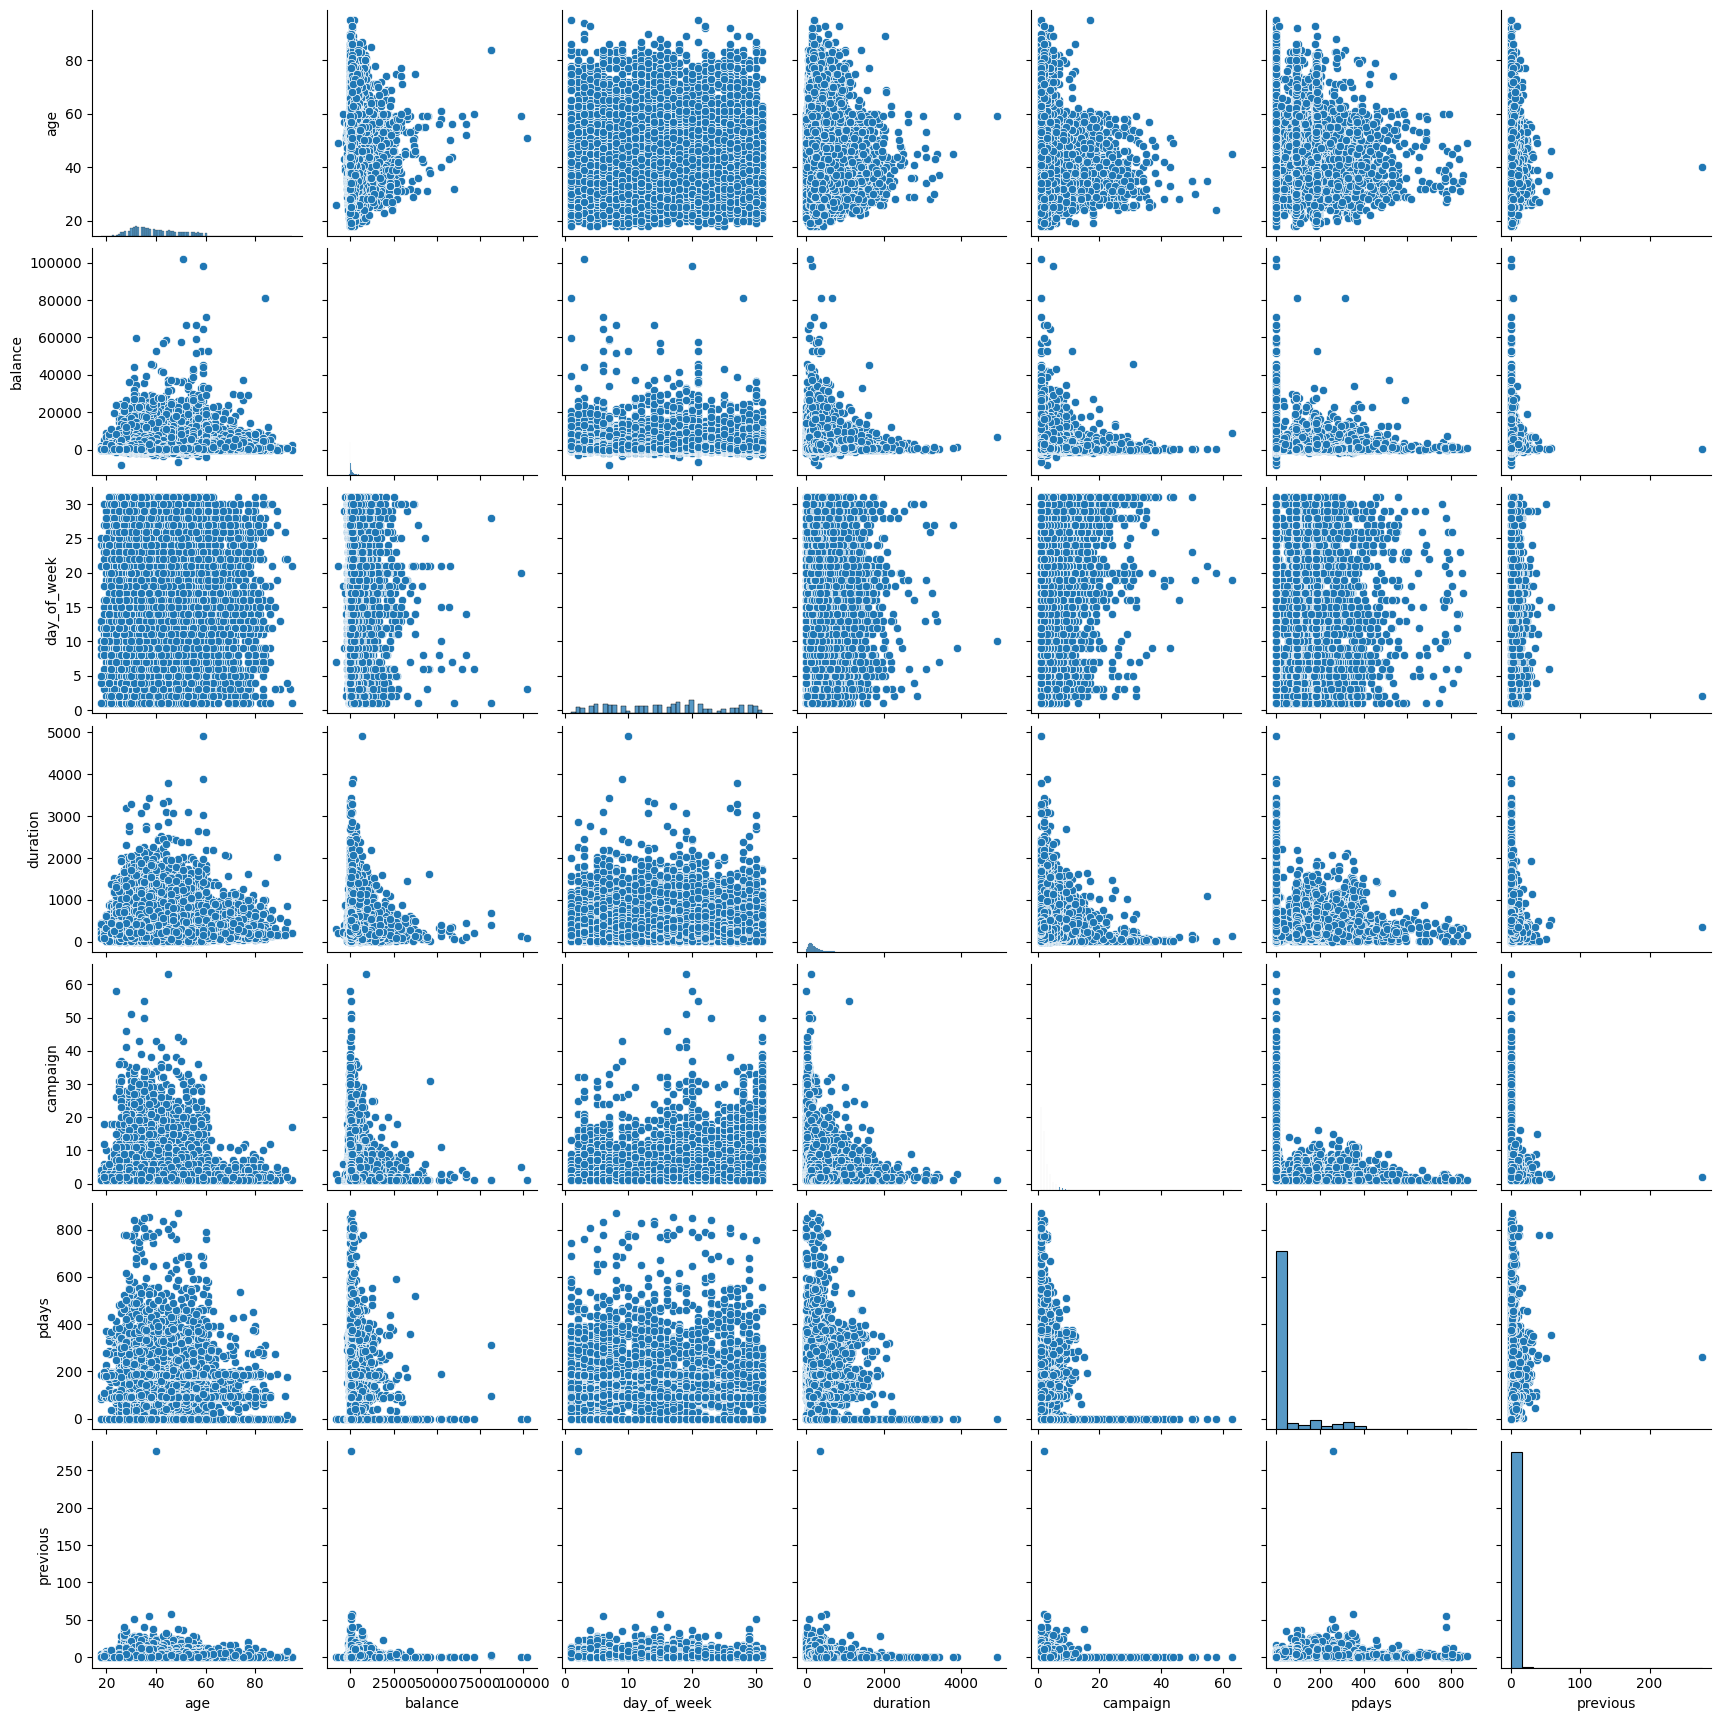

In [57]:
# Pairplot
sns.pairplot(df)

<Axes: >

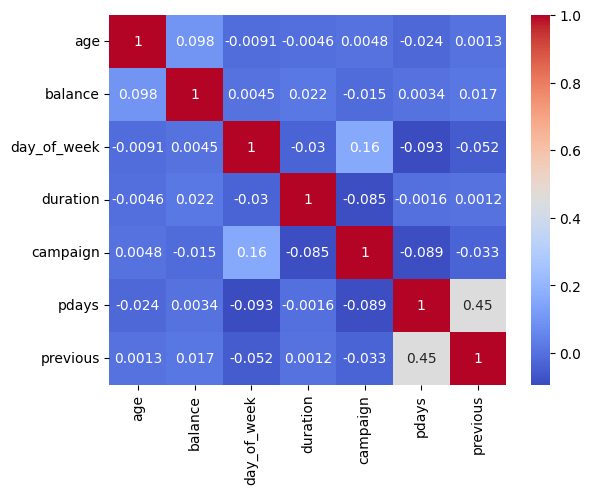

In [60]:
# Correlation Matrix
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')

### Preprocess: Pipeline

In [89]:
# Split the data into X and y
X = df.drop('y', axis=1)
y = df['y']

In [90]:
y = y.map({'yes': 1, 'no': 0})

In [91]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 45211 entries, 0 to 45210
Series name: y
Non-Null Count  Dtype
--------------  -----
45211 non-null  int64
dtypes: int64(1)
memory usage: 353.3 KB


In [92]:
# Split the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
# Define num and cat cols
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

In [94]:
num_cols

['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous']

In [95]:
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [96]:
# Create a pipeline for features
num_pipe = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [97]:
# Combine pipelines in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipe, num_cols),
        ('cat', cat_pipe, cat_cols)
    ]
)

In [98]:
# Fit and transform the data
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

In [101]:
y_train.head()

,y
3344,0
17965,0
18299,0
10221,0
32192,1


### Defining, Training and Evaluating the model

In [102]:
X_train_prep.shape

(36168, 51)

In [103]:
# Build the model
model = Sequential([
    Input(shape=(51,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [104]:
# Train the model
model.fit(X_train_prep, y_train, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15
905/905 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8839 - loss: 0.2707 - val_accuracy: 0.8976 - val_loss: 0.2185
Epoch 2/15
905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9013 - loss: 0.2161 - val_accuracy: 0.9048 - val_loss: 0.2043
Epoch 3/15
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9113 - loss: 0.2001 - val_accuracy: 0.9063 - val_loss: 0.2016
Epoch 4/15
905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9096 - loss: 0.1971 - val_accuracy: 0.9079 - val_loss: 0.1990
Epoch 5/15
905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9158 - loss: 0.1873 - val_accuracy: 0.9078 - val_loss: 0.1997
Epoch 6/15
905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9197 - loss: 0.1822 - val_accuracy: 0.9078 - val_loss: 0.1975
Epoch 7/15
905/905 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9200 - loss: 0.1778 - val_accuracy: 0.9036 - val_loss: 0.2018
Epoch 8/15
905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9218 - loss: 0.1722 - val_accuracy: 0.

In [105]:
# Predicting the model
y_pred = model.predict(X_test_prep)
y_pred = (y_pred > 0.5).astype(int)

283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [106]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
class_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{class_rep}")

Accuracy: 0.9020236647130377
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      7952
           1       0.61      0.52      0.56      1091

    accuracy                           0.90      9043
   macro avg       0.77      0.74      0.75      9043
weighted avg       0.90      0.90      0.90      9043

